<a href="https://colab.research.google.com/github/zainab9271/AI-Dojo_Machine_learning_bootcamp/blob/main/Assignments_03_Zainab_Shakor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03: Machine Learning 

This week's assignment is to prepare a dataset and train a Machine Learning algorithm on the dataset to accurately predict **median house value**.
 

Before starting copy this file and work on your own copy by going to `File > Save Copy in Drive.` Then add your name to the file (e.g., Assignment 03: Machine Learning - Muntadher Alkaabi).

 

Submission Deadline: **Thursday, 2/3/2022 at 3:00 PM**

 

**Requirements:**


	
	
1. Import necessary libraries for the machine learning project.
	
	
	
2. Read and apply necessary preprocessing steps on the dataset:
    1. Drop the following columns (`longitude`, `latitude`)
		
	2. Convert the words in the `ocean_proximity` column to numeric values.
		
	3. Normalize the dataset (make sure to print info and descriptions with the histogram for the dataset).
		
	
	
	
3. Split the dataset using a 80/20 training/testing split (don't forget to set the `random_state` to 42).
	
	
	
4. Create and train 4 Machine Learning models.
	
	
	
5. Use the right evaluation metrics to choose the best model (write down your choice for the best model).
	


**Note:** To get the best performance from model, manually tune the hyperparameters of each model.

 

Find relevant links below: 

[Dataset](https://docs.google.com/spreadsheets/d/1bc0on1l8EUUPXyzTV3A09Dj07uzZAy88wSU8SoxRBGo/edit?usp=sharing)

[Submission Form](https://forms.gle/rqv8KrFTfudR2QXX9)
 

Good luck and feel free to ask any questions in the comments or on the Questions channel.

# Upload the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing.csv to housing.csv
User uploaded file "housing.csv" with length 1195688 bytes


# Import necessary libraries for the machine learning project.

In [ ]:
# write your code here.
from sklearn import preprocessing, model_selection, metrics, linear_model, svm, tree, ensemble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read and apply necessary preprocessing steps on the dataset

In [ ]:
# read the csv file 
df = pd.read_csv('/content/housing.csv')

In [ ]:
# print the head of the data 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# print the describe of the dataframe 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# print the info of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [ ]:
# drop the longitude, latitude columns 
df.drop(columns= ['longitude', 'latitude'], axis=1, inplace= True)

In [ ]:
# print the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  int64  
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [ ]:
# count how many nan values are in the dataframe
df.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# fill the nan values with the mean of the 
df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace= True)

In [ ]:
# count how many nan values are in the dataframe
df.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# convert the words to numerical values 
# create function that return two dictionary of word to index and the other index word 
def string_to_numerics(column):
  word_index = {}
  index_word = {}

  for index, word in enumerate(column.unique()):
      word_index[word] = index
      index_word[index] = word

  # return word to index & index to word dictionaries 
  return word_index, index_word


In [ ]:
#convert the string to numeric
word_index, index_word = string_to_numerics(df.ocean_proximity)
df.ocean_proximity = df.ocean_proximity.map(word_index)

In [ ]:
# print the dataframe
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,8.3252,452600,0
1,21,7099,1106.0,2401,1138,8.3014,358500,0
2,52,1467,190.0,496,177,7.2574,352100,0
3,52,1274,235.0,558,219,5.6431,341300,0
4,52,1627,280.0,565,259,3.8462,342200,0
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,2
20636,18,697,150.0,356,114,2.5568,77100,2
20637,17,2254,485.0,1007,433,1.7000,92300,2
20638,18,1860,409.0,741,349,1.8672,84700,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ca764c1d0>,
      dtype=object)

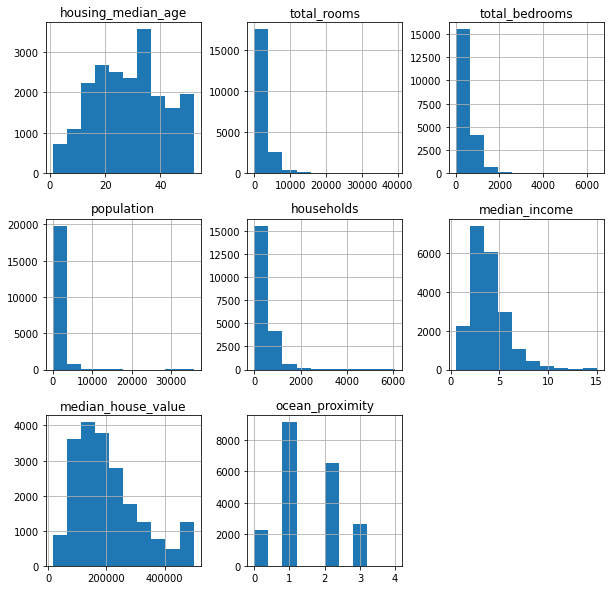

In [ ]:
# plot the hist for the dataframe 
df.hist(figsize=(10,10))

# Split the dataset to 20% for testing and 80% for training.

In [ ]:
# split the dataset to x and y 
y= df.pop('median_house_value')
x= df

In [ ]:
x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,129.0,322,126,8.3252,0
1,21,7099,1106.0,2401,1138,8.3014,0
2,52,1467,190.0,496,177,7.2574,0
3,52,1274,235.0,558,219,5.6431,0
4,52,1627,280.0,565,259,3.8462,0
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,2
20636,18,697,150.0,356,114,2.5568,2
20637,17,2254,485.0,1007,433,1.7000,2
20638,18,1860,409.0,741,349,1.8672,2


In [ ]:
# normalize the values of x and y
x_norm_MinMax = preprocessing.MinMaxScaler().fit_transform(x)

y_norm_MinMax = preprocessing.MinMaxScaler().fit_transform(y.values.reshape(-1,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff473cdf2d0>,
      dtype=object)

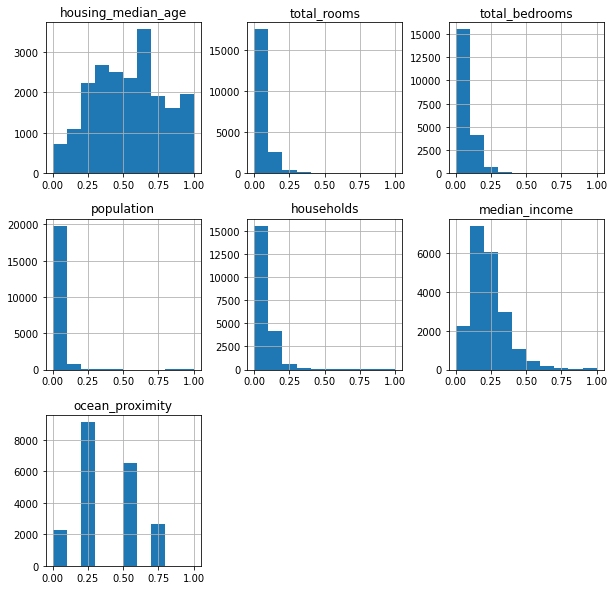

In [ ]:
# plot the hist for the normalized x
x_norm_MinMax_df = pd.DataFrame(x_norm_MinMax, columns=x.columns)
x_norm_MinMax_df.hist(figsize=(10,10))

(array([ 877., 3612., 4099., 3771., 2804., 1764., 1239.,  752.,  479.,
        1243.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

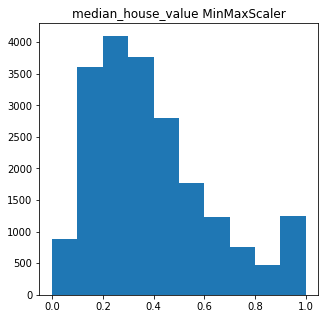

In [ ]:
plt.figure(figsize=(5,5))
plt.title(y.name + ' MinMaxScaler')
plt.hist(y_norm_MinMax)

In [ ]:
# split the data to train and test 
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_norm_MinMax, y_norm_MinMax, test_size= 0.2, random_state= 42)

# Create and train 4 Machine Learning models.


##Multiple Linear Regression

In [ ]:
linearReg_model = linear_model.LinearRegression().fit(X_train, y_train)
y_pred_LinearReg = linearReg_model.predict(X_test)

##Support Vector Regression (SVR)

In [ ]:
svr_model = svm.SVR(C=10, kernel='rbf', gamma=8).fit(X_train, y_train)
y_pred_SVR = svr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Decision Tree Regression

In [ ]:
DcTree_model = tree.DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=5, max_leaf_nodes=71).fit(X_train, y_train)
y_pred_DcTree = DcTree_model.predict(X_test)

##Random Forest Regression

In [ ]:
rForest_model = ensemble.RandomForestRegressor(n_estimators=120, max_depth=25, min_samples_split=10, min_samples_leaf=4, random_state=42, n_jobs=-1)
rForest_model = rForest_model.fit(X_train, y_train)
y_pred_rForest = rForest_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# Use the right evaluation metrics to choose the best model.

In [ ]:
def estimate(predictions):
    for key in predictions:
        print(f'\nEvaluation of {key}:')
        print(f'Mean Squared Error = {metrics.mean_squared_error(predictions[key][0], predictions[key][1])}')
        print(f'R2 Score = {metrics.r2_score(predictions[key][0], predictions[key][1])}')

In [ ]:
predictions = {'Multiple Linear Regression': [y_test, y_pred_LinearReg],
               'Support Vector Regression': [y_test, y_pred_SVR],
               'Decision Tree Regression': [y_test, y_pred_DcTree],
               'Random Forest Regression': [y_test, y_pred_rForest]}

estimate(predictions)



Evaluation of Multiple Linear Regression:
Mean Squared Error = 0.02522744181534567
R2 Score = 0.5471510008792229

Evaluation of Support Vector Regression:
Mean Squared Error = 0.016987942646202965
R2 Score = 0.6950553733999854

Evaluation of Decision Tree Regression:
Mean Squared Error = 0.020921137438798153
R2 Score = 0.6244519670692521

Evaluation of Random Forest Regression:
Mean Squared Error = 0.01695329807680888
R2 Score = 0.6956772659680039


##Conclusion

<font size='4'> According to the result, the model which fits well to dependent variables is <font color='red'>***Random Forest Regressor***.</font></font>